In [1]:
# General purpose libraries
import numpy as np, os, sys, time
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

############### CLONE MASCLET_FRAMEWORK FROM https://github.com/dvallesp/masclet_framework #####
sys.path.append('/scratch/valles/masclet_framework/')
import masclet_framework as masclet 
################################################################################################

# vortex_reader libraries
import fortran_reader as fr 
import parameters 
import vortex_reader

In [2]:
# Path to your output files
path = '../src/output_files/'

In [4]:
nmax = 256 # Base grid size
nl = 6 # Number of levels
size = 50.e3 # Size of the domain in input units

it = 144 # Snapshot number to read

parameters.write_parameters(nmax, nmax, nmax, nl, size, path=path) # This will create a file needed by the rest of readers

# Producing slices or projections of a region

### Choose bbox (for projections)

In [7]:
## Pick the centre of the box, the width of the box, and the number of refinement levels to consider (utl).
cx, cy, cz = 0., 0., 0.
wx, wy, wz = 5e3, 5e3, 5e3
utl = 4

xl, yl, zl = cx-wx/2, cy-wy/2, cz-wz/2
xr, yr, zr = cx+wx/2, cy+wy/2, cz+wz/2

i1 = int((xl+size/2)/size*nmax)
i2 = int((xr+size/2)/size*nmax)
j1 = int((yl+size/2)/size*nmax)
j2 = int((yr+size/2)/size*nmax)
k1 = int((zl+size/2)/size*nmax)
k2 = int((zr+size/2)/size*nmax)

bbox_int = [i1, i2, j1, j2, k1, k2]
print('The box will cover the slice {:}:{:}, {:}:{:}, {:}:{:} of the base grid'.format(*bbox_int))

bbox = [bbox_int[0]*size/nmax-size/2, (bbox_int[1]+1)*size/nmax-size/2, 
        bbox_int[2]*size/nmax-size/2, (bbox_int[3]+1)*size/nmax-size/2,
        bbox_int[4]*size/nmax-size/2, (bbox_int[5]+1)*size/nmax-size/2]
print('The box will cover the volume {:}:{:}, {:}:{:}, {:}:{:} (input length units)'.format(*bbox))

nuni_x = (i2-i1+1)*2**utl 
nuni_y = (j2-j1+1)*2**utl
nuni_z = (k2-k1+1)*2**utl
print('The uniform grid will have dimensions',nuni_x, nuni_y, nuni_z)

xl, xr, yl, yr, zl, zr = bbox
dx_uni = (xr - xl)/nuni_x

xuni = np.linspace(xl + dx_uni/2, xr - dx_uni/2, nuni_x)
yuni = np.linspace(yl + dx_uni/2, yr - dx_uni/2, nuni_y)
zuni = np.linspace(zl + dx_uni/2, zr - dx_uni/2, nuni_z)

print('The uniform grid will have resolution', dx_uni)

The box will cover the slice 115:140, 115:140, 115:140 of the base grid
The box will cover the volume -2539.0625:2539.0625, -2539.0625:2539.0625, -2539.0625:2539.0625 (input length units)
The uniform grid will have dimensions 416 416 416
The uniform grid will have resolution 12.20703125


## Read gridded data and make projections/slices

In [8]:
grids = vortex_reader.read_grids(it, path=path)
npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz = \
    [grids[k] for k in ['npatch', 'patchnx', 'patchny', 'patchnz', 'patchrx', 'patchry', 'patchrz']]

In [9]:
cr0amr, solap = vortex_reader.read_grid_overlaps(it, path=path)

In [10]:
density = vortex_reader.read_gridded_density(it, path=path)

In [14]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(density, cr0amr, solap, npatch, up_to_level=utl), 
                                                bbox, utl, npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz, size, nmax)

<AxesSubplot:>

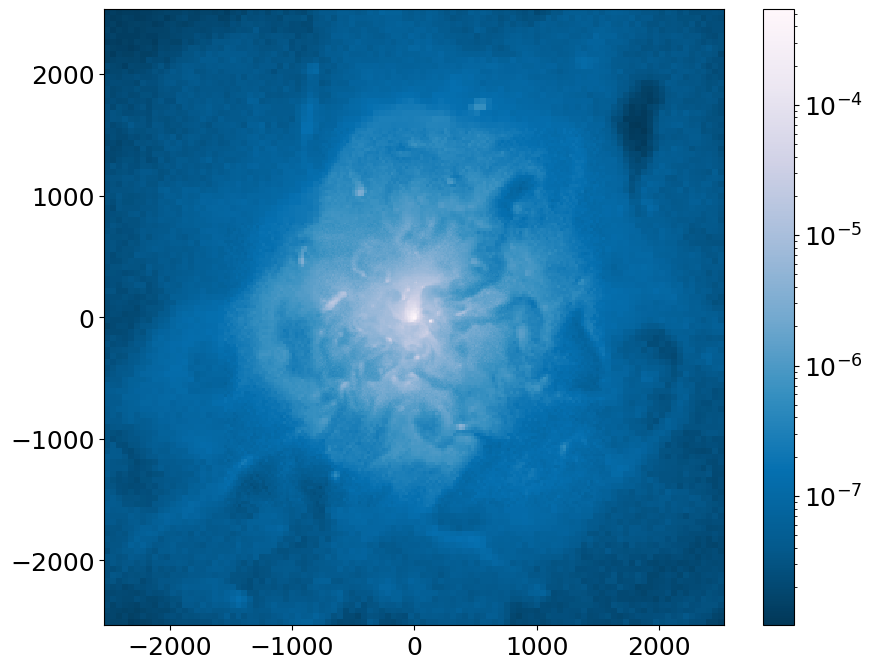

In [15]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True)

In [ ]:
kernel_length = vortex_reader.read_gridded_kernel_length(it, path=path)

In [ ]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(kernel_length, cr0amr, solap, npatch, up_to_level=utl), 
                                                bbox, utl, npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz, size, nmax)

In [ ]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True)

In [17]:
vx, vy, vz = vortex_reader.read_gridded_velocity(it, path=path)

In [18]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(vx, cr0amr, solap, npatch, up_to_level=utl), 
                                                bbox, utl, npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz, size, nmax)

<AxesSubplot:>

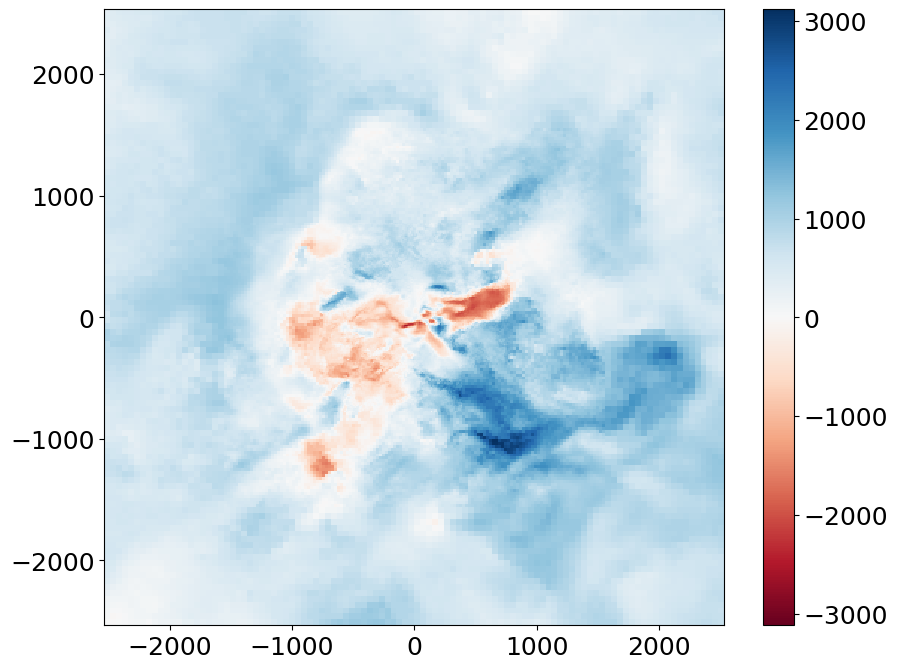

In [19]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [20]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(vy, cr0amr, solap, npatch, up_to_level=utl), 
                                                bbox, utl, npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz, size, nmax)

<AxesSubplot:>

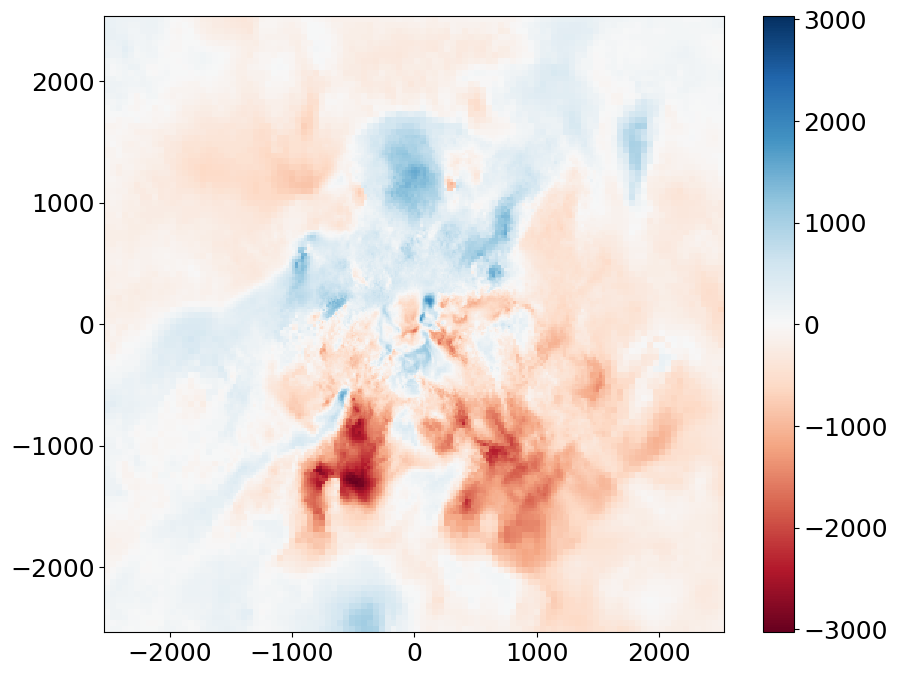

In [21]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [22]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(vz, cr0amr, solap, npatch, up_to_level=utl), 
                                                bbox, utl, npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz, size, nmax)

<AxesSubplot:>

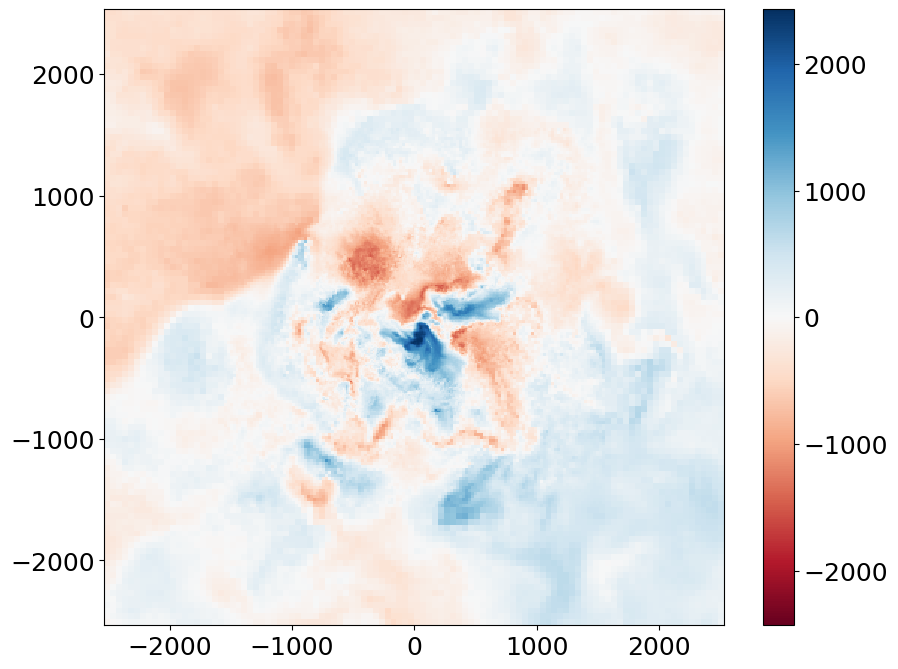

In [23]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [25]:
mach = vortex_reader.read_gridded_mach(it, path=path)

In [26]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(mach, cr0amr, solap, npatch, up_to_level=utl), 
                                                bbox, utl, npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz, size, nmax)

<AxesSubplot:>

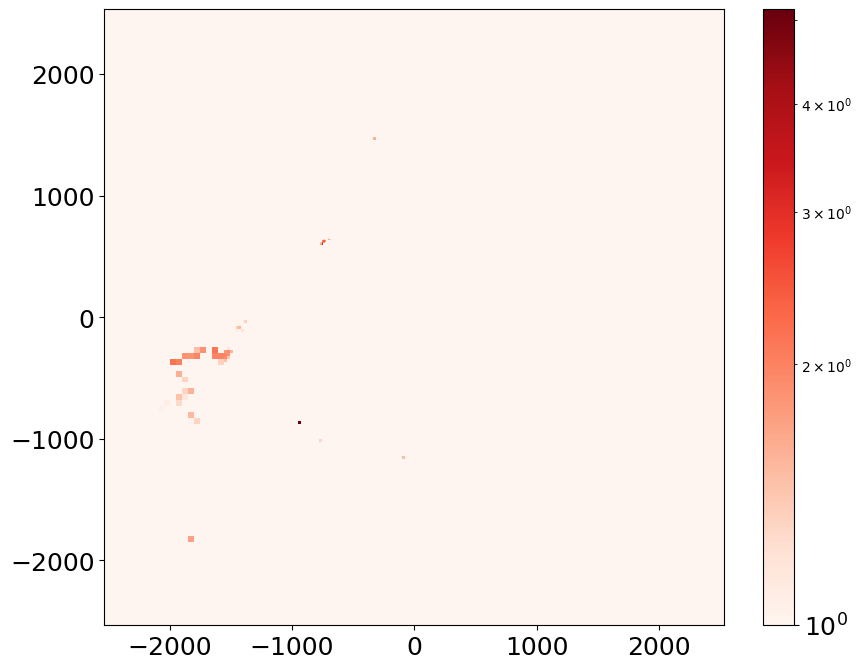

In [27]:
proj = unigrid[:,:, nuni_z//2 + 16 : nuni_z//2 + 16 + 1].max(axis=2)
proj[proj<1]=1
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='Reds')

## Read gridded results

In [28]:
divv = vortex_reader.read_divv(it, path=path)

In [29]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(divv, cr0amr, solap, npatch, up_to_level=utl), 
                                                bbox, utl, npatch, patchnx, patchny, patchnz, patchrx, patchry, patchrz, size, nmax)

<AxesSubplot:>

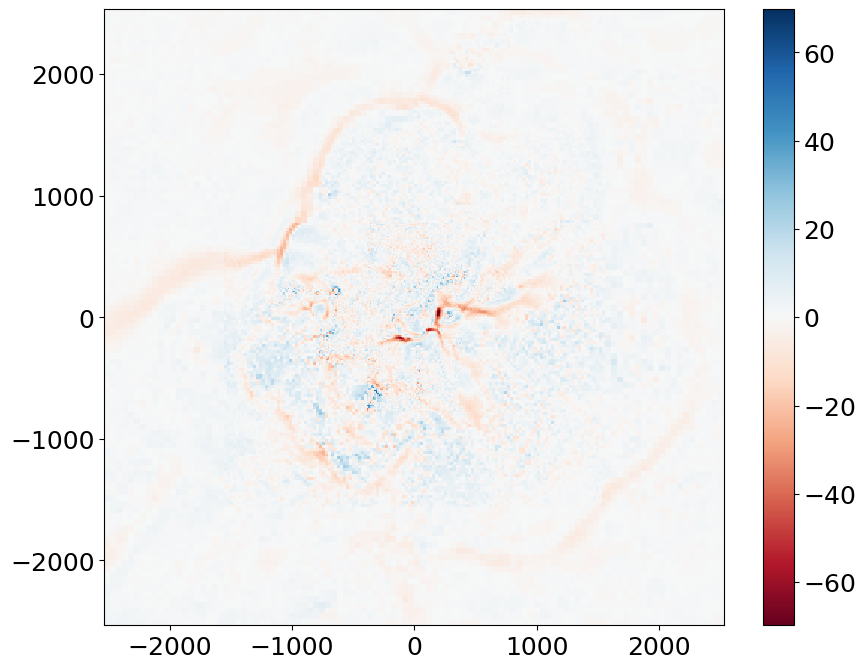

In [32]:
proj = unigrid[:,:, nuni_z//2-16 : nuni_z//2-16 + 1].mean(axis=2)
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='RdBu',
                            cbarmin=-np.max(np.abs(proj)), cbarmax=np.max(np.abs(proj)))

In [33]:
curlvx, curlvy, curlvz = vortex_reader.read_curlv(it, path=path)

In [35]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field([0.5*(xx**2 + yy**2 + zz**2) for xx,yy,zz in zip(curlvx, curlvy, curlvz)], cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

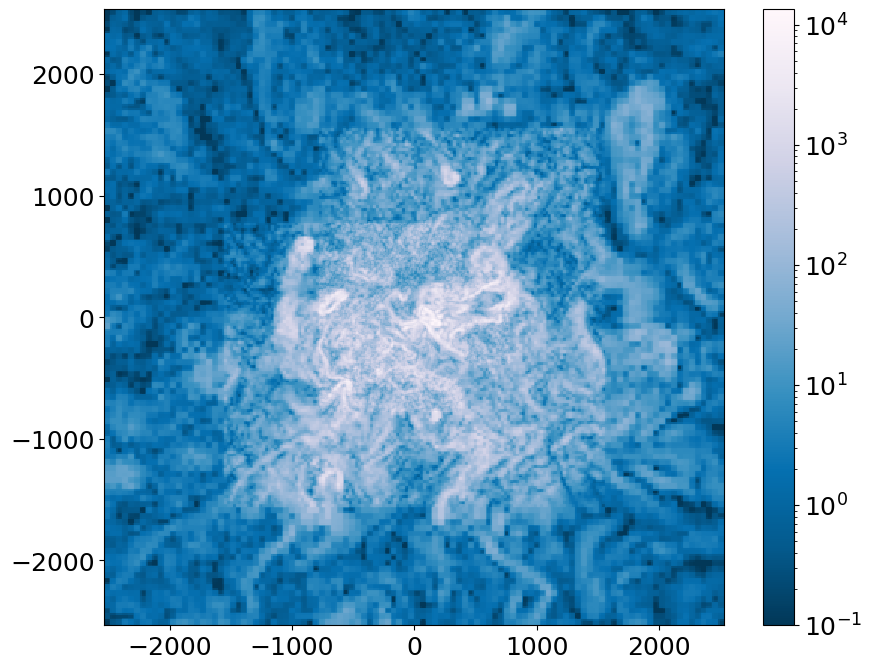

In [43]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(gaussian_filter(proj, sigma=.5), x=xuni, y=yuni, are_meshgrid=False, logz=True, cbarmin=0.1)

In [45]:
spot = vortex_reader.read_spot(it, path=path)

In [46]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(spot, cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

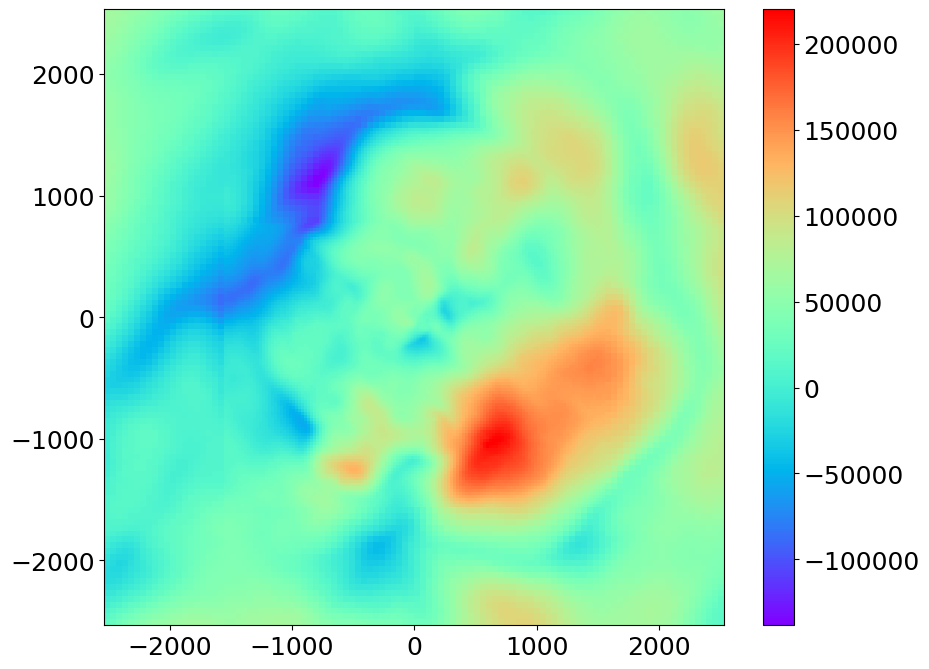

In [47]:
proj = unigrid[:,:, nuni_z//2]
proj = proj 
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='rainbow')

In [48]:
vpotx, vpoty, vpotz = vortex_reader.read_vpot(it, path=path)

In [49]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field([0.5*(xx**2 + yy**2 + zz**2) for xx,yy,zz in zip(vpotx, vpoty, vpotz)], cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

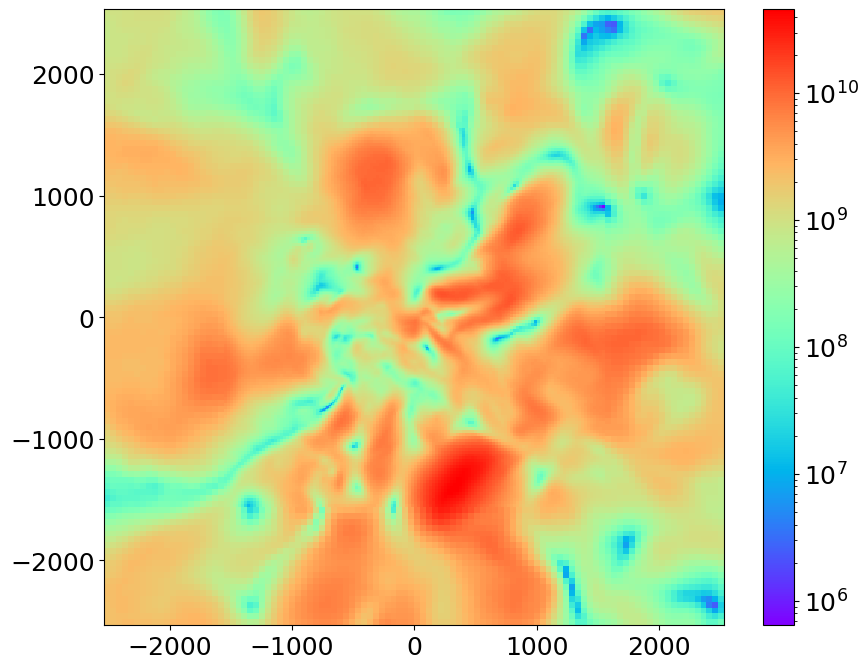

In [50]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='rainbow')

In [51]:
vcompx, vcompy, vcompz = vortex_reader.read_vcomp(it, path=path)

In [54]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field([(xx**2 + yy**2 + zz**2)**0.5 for xx,yy,zz in zip(vcompx, vcompy, vcompz)], cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

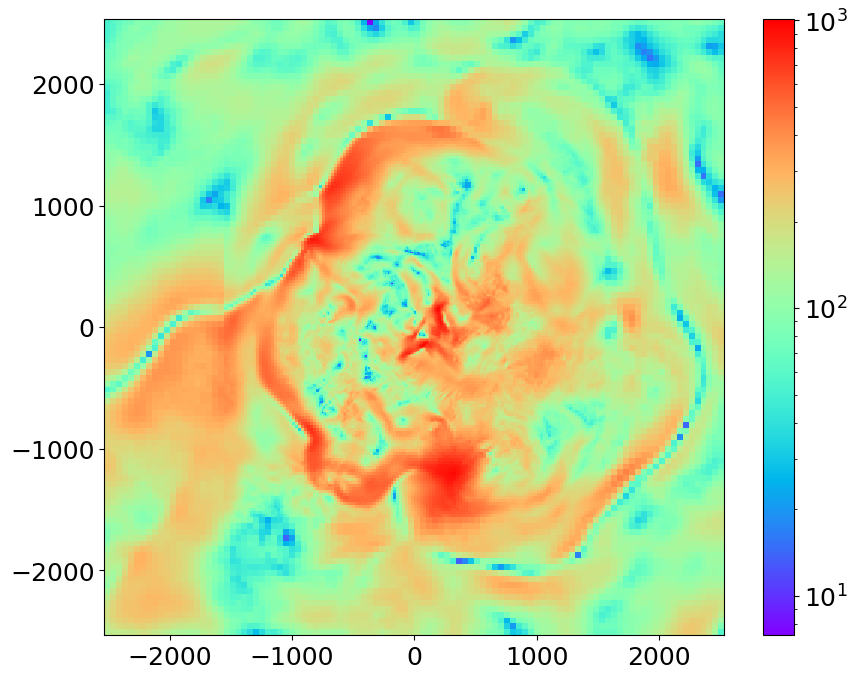

In [56]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(gaussian_filter(proj, sigma=0.3), x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='rainbow')

In [57]:
vsolx, vsoly, vsolz = vortex_reader.read_vsol(it, path=path, filename='vsol')

In [60]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field([(xx**2 + yy**2 + zz**2)**0.5 for xx,yy,zz in zip(vsolx, vsoly, vsolz)], cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

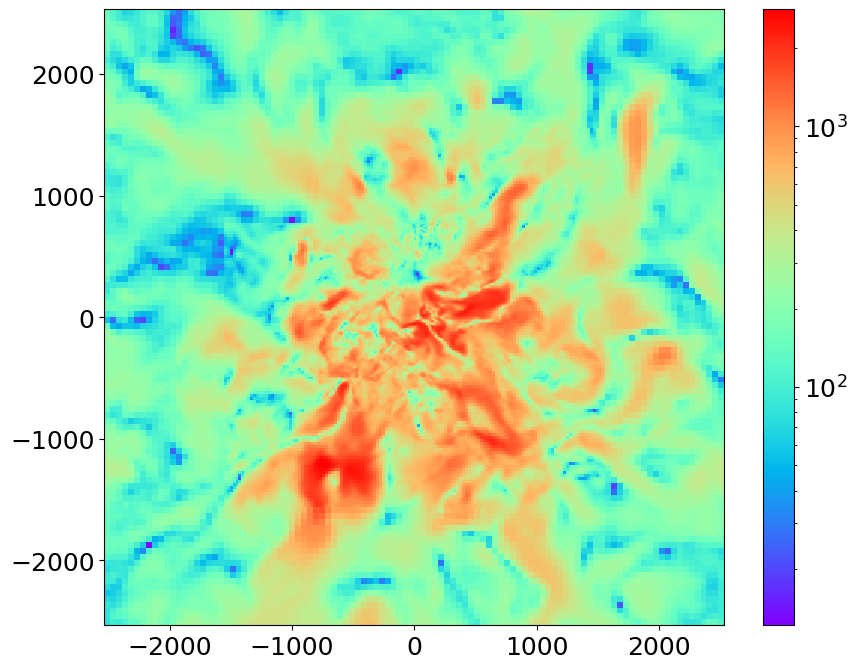

In [61]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='rainbow')

### Read filter data

In [62]:
filtlen = vortex_reader.read_gridded_filtlen(it, path=path)

In [64]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(filtlen, cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

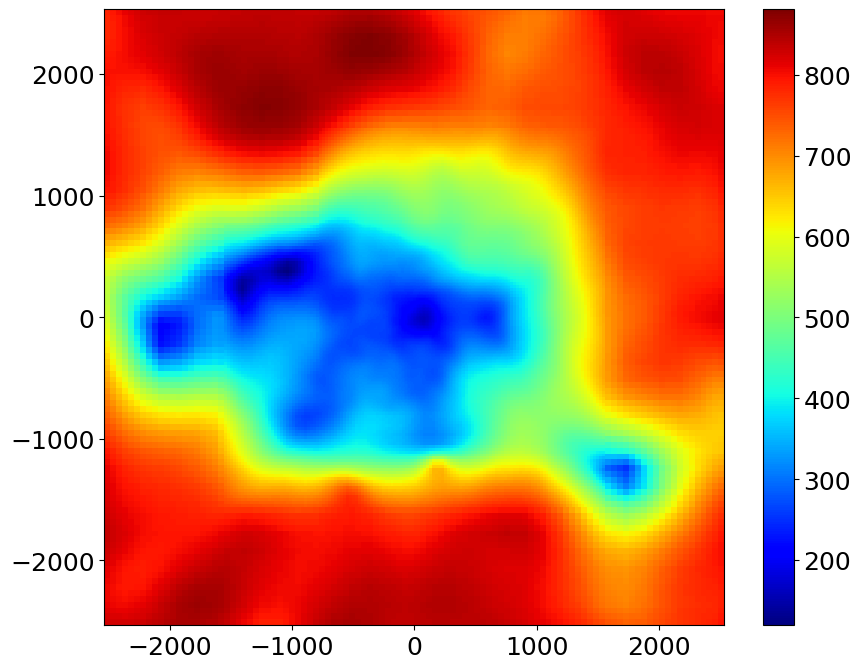

In [65]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='jet')

In [66]:
vturbx, vturby, vturbz = vortex_reader.read_gridded_vturb(it, path=path)

In [67]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field([(xx**2 + yy**2 + zz**2)**0.5 for xx,yy,zz in zip(vturbx, vturby, vturbz)], cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

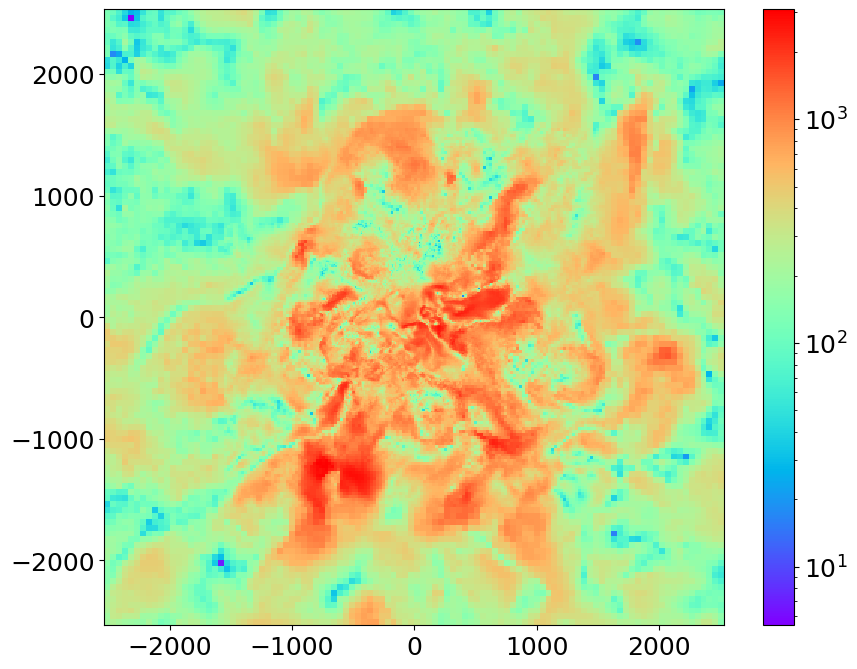

In [68]:
proj = unigrid[:,:, nuni_z//2]
#proj = proj - proj.min() + np.std(proj)
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=True, cmap='rainbow')

In [69]:
shocked = vortex_reader.read_shocked(it, path=path)

In [70]:
unigrid = masclet.tools.uniform_grid_zoom(masclet.tools.clean_field(shocked, cr0amr, solap, npatch, up_to_level=utl), 
                                bbox, utl, npatch, patchnx,
                                patchny, patchnz, patchrx, patchry, patchrz, 
                                size, nmax)

<AxesSubplot:>

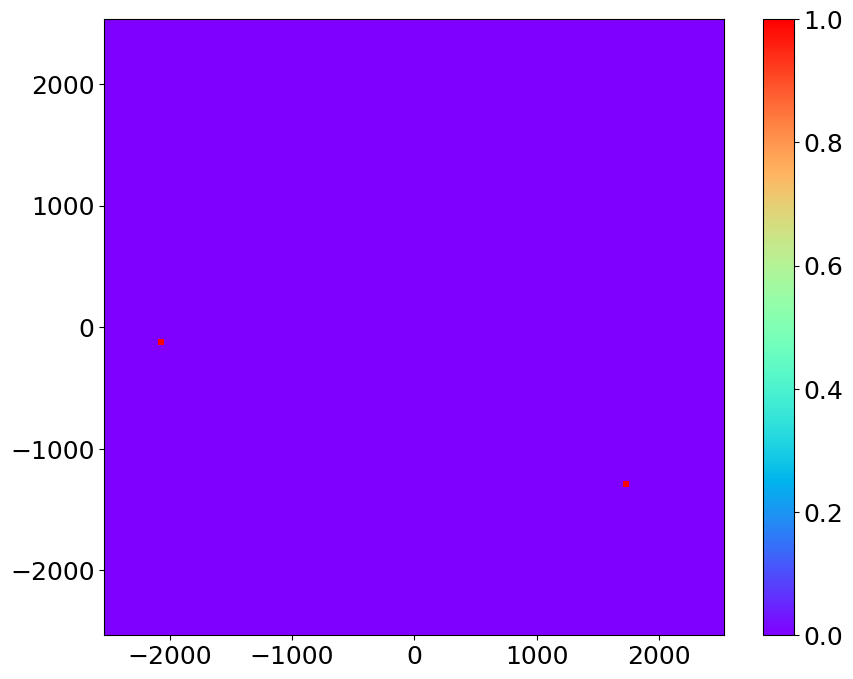

In [71]:
proj = unigrid[:,:, nuni_z//2]
masclet.graphics.colormap2d(proj, x=xuni, y=yuni, are_meshgrid=False, logz=False, cmap='rainbow')

### If you need just slices, and not a whole projection (or 3d grid), there is an alternative, simpler way of doing this:

In [74]:
interpolate=False

projdv, vecE, vecN = masclet.graphics.slice_map(
                                        [np.sqrt(vxi**2+vyi**2+vzi**2) for vxi,vyi,vzi in zip(vturbx, vturby, vturbz)],  # The field to be plotted
                                        [0,1,0], [0,0,1], # Normal vector and north (up) vector
                                        0,0,0, # Center of the slice
                                        npatch,patchnx,patchny,patchnz,patchrx,patchry,patchrz,size,nmax,nl, # Do not change these
                                        widthN=5000, widthE=5000, res=8, # Width of the slice in N and E directions, and resolution of the slice
                                        resN=None, resE=None, nN=None, nE=None, # Alternatively you can specify the resolution in N and E directions, or number of points in N and E directions
                                        kept_patches=None, # Do not change this
                                        interpolate=interpolate, # Do not change this
                                        return_grid=True, return_grid_3d=False, # Do not change this
                                        use_tqdm=True)

projdvcomp, vecE, vecN = masclet.graphics.slice_map(
                                        [np.sqrt(vxi**2+vyi**2+vzi**2) for vxi,vyi,vzi in zip(vcompx, vcompy,vcompz)], 
                                        [0,1,0], [0,0,1],
                                        0,0,0,
                                        npatch,patchnx,patchny,patchnz,patchrx,patchry,patchrz,size,nmax,nl,
                                        #widthN=2000, widthE=2000, res=2, 
                                        #widthN=12000, widthE=12000, res=20,
                                        widthN=5000, widthE=5000, res=8,
                                        resN=None, resE=None, nN=None, nE=None,
                                        kept_patches=None,
                                        interpolate=interpolate,
                                        return_grid=True, return_grid_3d=False,
                                        use_tqdm=True)

projdvsol, vecE, vecN = masclet.graphics.slice_map(
                                        [np.sqrt(vxi**2+vyi**2+vzi**2) for vxi,vyi,vzi in zip(vsolx, vsoly,vsolz)],
                                        [0,1,0], [0,0,1],
                                        0,0,0,
                                        npatch,patchnx,patchny,patchnz,patchrx,patchry,patchrz,size,nmax,nl,
                                        #widthN=2000, widthE=2000, res=2, 
                                        #widthN=12000, widthE=12000, res=20,
                                        widthN=5000, widthE=5000, res=8,
                                        resN=None, resE=None, nN=None, nE=None,
                                        kept_patches=None,
                                        interpolate=interpolate,
                                        return_grid=True, return_grid_3d=False,
                                        use_tqdm=True)

projfiltlen, vecE, vecN = masclet.graphics.slice_map(
                                        filtlen,
                                        [0,1,0], [0,0,1],
                                        0,0,0,
                                        npatch,patchnx,patchny,patchnz,patchrx,patchry,patchrz,size,nmax,nl,
                                        #widthN=2000, widthE=2000, res=2, 
                                        #widthN=12000, widthE=12000, res=20,
                                        widthN=5000, widthE=5000, res=8,
                                        resN=None, resE=None, nN=None, nE=None,
                                        kept_patches=None,
                                        interpolate=interpolate,
                                        return_grid=True, return_grid_3d=False,
                                        use_tqdm=True)

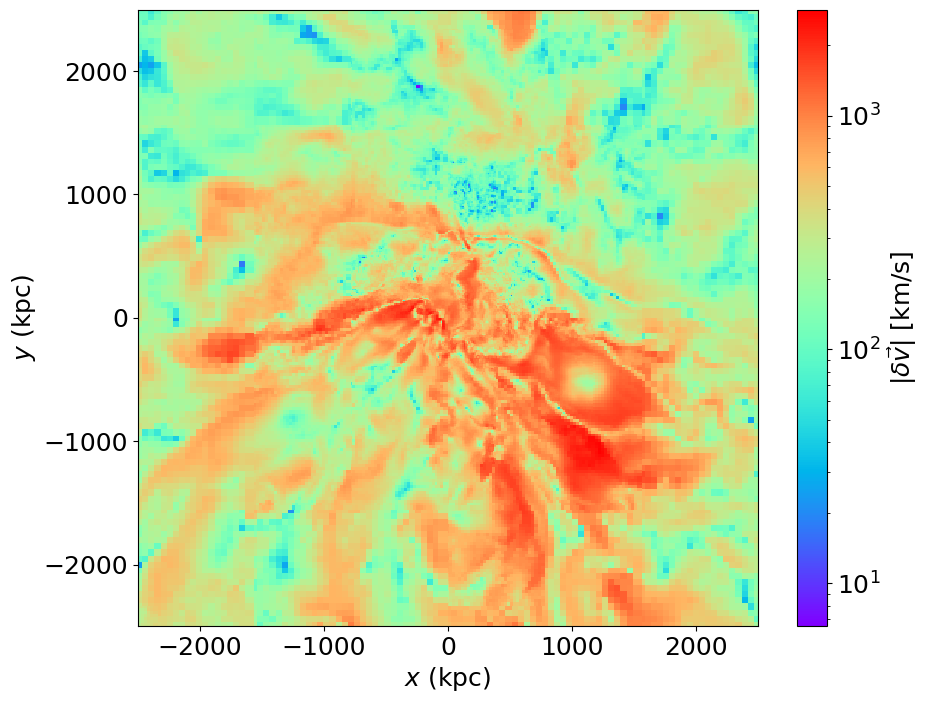

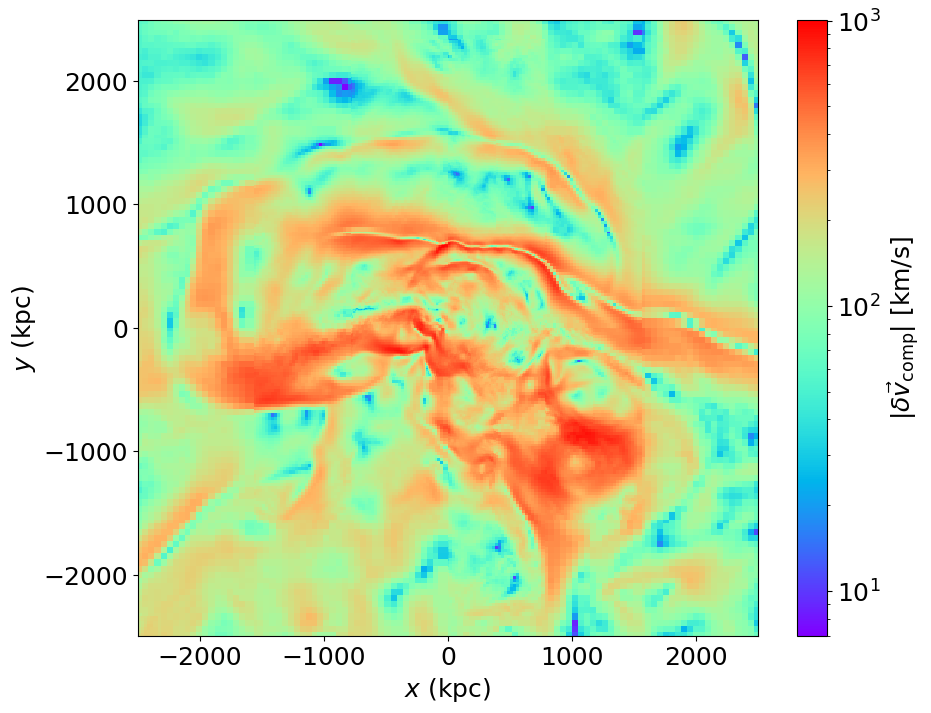

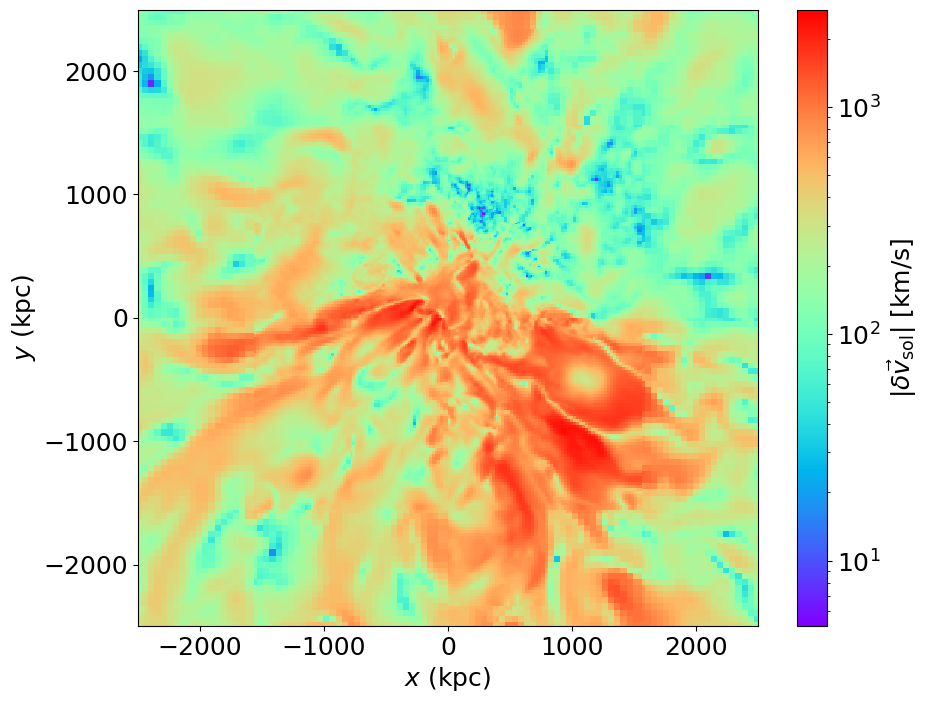

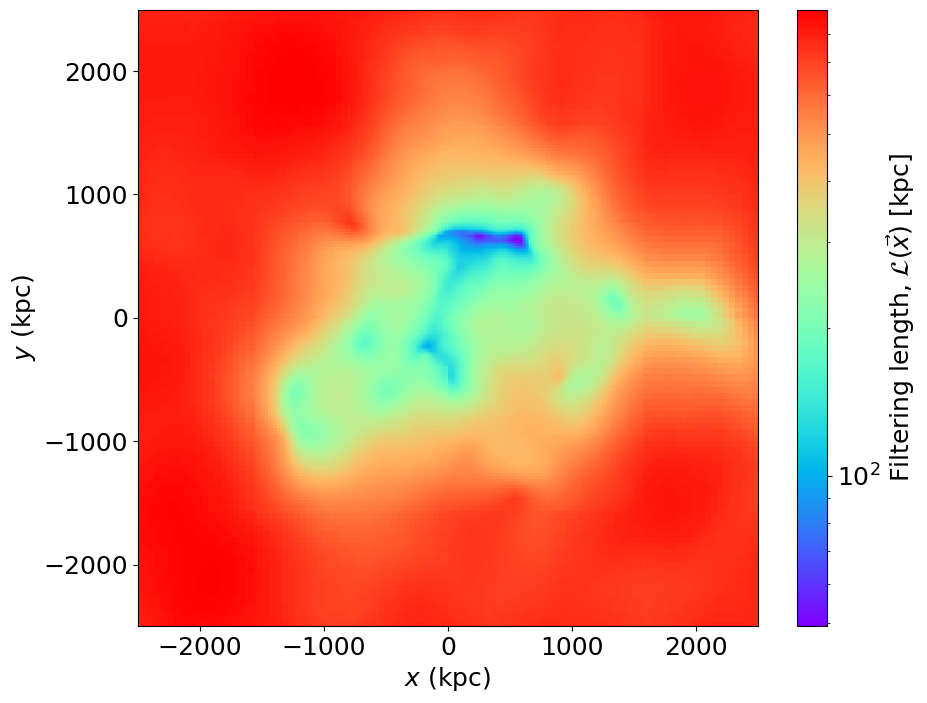

In [75]:
projplot = projdv.copy()
ax = masclet.graphics.colormap2d(projplot, are_xy_given=True, are_meshgrid=False, x=vecE, y=vecN, logz=True,
                                 cmap='rainbow', cbarlabel=r'$|\delta \vec{v}|$ [km/s]', xlabel='$x$ (kpc)', ylabel='$y$ (kpc)')


projplot = projdvcomp.copy()
ax = masclet.graphics.colormap2d(projplot, are_xy_given=True, are_meshgrid=False, x=vecE, y=vecN, logz=True,
                                 cmap='rainbow', cbarlabel=r'$|\delta \vec{v}_\mathrm{comp}|$ [km/s]', xlabel='$x$ (kpc)', ylabel='$y$ (kpc)')

projplot = projdvsol.copy()
ax = masclet.graphics.colormap2d(projplot, are_xy_given=True, are_meshgrid=False, x=vecE, y=vecN, logz=True,
                                 cmap='rainbow', cbarlabel=r'$|\delta \vec{v}_\mathrm{sol}|$ [km/s]', xlabel='$x$ (kpc)', ylabel='$y$ (kpc)')

projplot = projfiltlen.copy()
projplot[projplot > 1001] = 1001
projplot[projplot < 1] = 1001
ax = masclet.graphics.colormap2d(projplot, are_xy_given=True, are_meshgrid=False, x=vecE, y=vecN, logz=True,
                                 cmap='rainbow', cbarlabel=r'Filtering length, $\mathcal{L}(\vec{x})$ [kpc]', xlabel='$x$ (kpc)', ylabel='$y$ (kpc)')

### Read particle data

In [74]:
errpart = vortex_reader.read_errorparticles(it, path=path)

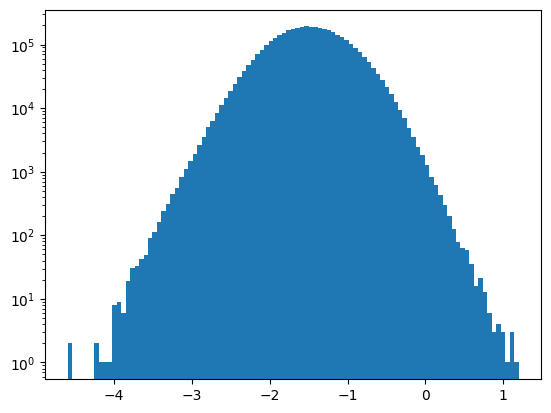

In [75]:
plt.hist(np.log10(errpart), bins=101, log=True);

In [76]:
results_particles = vortex_reader.read_velocityparticles(it, path=path, return_original_velocity=True)

In [77]:
results_particles.keys()

dict_keys(['orig_vxpart', 'orig_vypart', 'orig_vzpart', 'smooth_vxpart', 'smooth_vypart', 'smooth_vzpart', 'smooth_vxcomppart', 'smooth_vycomppart', 'smooth_vzcomppart', 'smooth_vxsolpart', 'smooth_vysolpart', 'smooth_vzsolpart'])

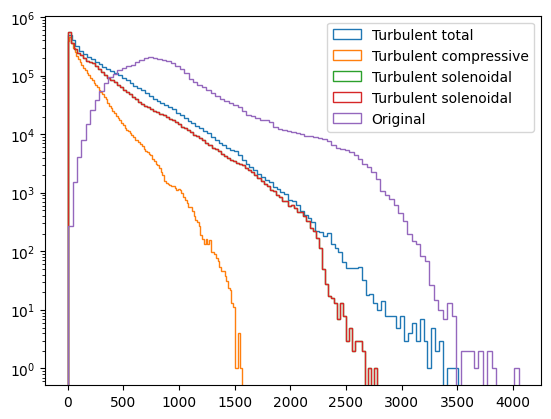

In [78]:
plt.hist(np.sqrt(results_particles['smooth_vxpart']**2 + results_particles['smooth_vypart']**2 + results_particles['smooth_vzpart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent total')
plt.hist(np.sqrt(results_particles['smooth_vxcomppart']**2 + results_particles['smooth_vycomppart']**2 + results_particles['smooth_vzcomppart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent compressive')
plt.hist(np.sqrt(results_particles['smooth_vxsolpart']**2 + results_particles['smooth_vysolpart']**2 + results_particles['smooth_vzsolpart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent solenoidal')
plt.hist(np.sqrt(results_particles['smooth_vxsolpart']**2 + results_particles['smooth_vysolpart']**2 + results_particles['smooth_vzsolpart']**2), bins=101, log=True, histtype='step', 
        label='Turbulent solenoidal')
plt.hist(np.sqrt(results_particles['orig_vxpart']**2 + results_particles['orig_vypart']**2 + results_particles['orig_vzpart']**2), bins=101, log=True, histtype='step', 
        label='Original')

plt.legend()